Predicted Retail Sales for 2021: 59,923,295 MWh
Actual Retail Sales for 2021: 59,303,974 MWh
Prediction Error: 619,321 MWh

Predicted Retail Sales for 2022: 61,421,041 MWh
Actual Retail Sales for 2022: 59,682,719 MWh
Prediction Error: 1,738,322 MWh

Predicted Retail Sales for 2023: 60,375,777 MWh
Actual Retail Sales for 2023: 57,033,085 MWh
Prediction Error: 3,342,692 MWh



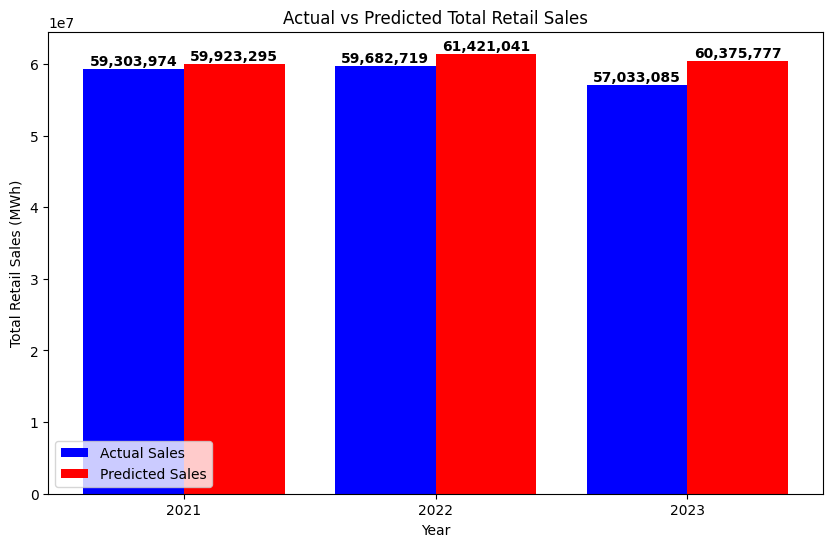

Mean Absolute Error (MAE): 1,900,112 MWh

Cross-Validation Results (MAE for each fold): [2581510.1        2507970.08        684431.75       1786903.03399999
 3342692.014     ]
Average MAE across all folds: 2,180,701 MWh


In [ ]:
#Random Forest Regression for Retail Sales Prediction
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023],
    "Revenue (thousand dollars)": [3741620, 3611327, 3551281, 3669204, 4057913, 4333163],
    "Avg Price (cents/kWh)": [13.3, 13.12, 13.01, 13.12, 14.46, 16.6],
    "Total retail sales (MWh)": [62086455, 60720658, 57629040, 59303974, 59682719, 57033085]
}

df = pd.DataFrame(data)

years = [2021, 2022, 2023]
predicted_sales = []
actual_sales = []

for year in years:
    train_data = df[df["Year"] < year]
    X_train = train_data[["Avg Price (cents/kWh)"]]
    y_train = train_data["Total retail sales (MWh)"]
    
    test_data = df[df["Year"] == year][["Avg Price (cents/kWh)"]]
    actual_sales.append(df[df["Year"] == year]["Total retail sales (MWh)"].values[0])
    
    # Normalize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(test_data)
    
    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    predicted_value = model.predict(X_test_scaled)[0]
    predicted_sales.append(predicted_value)
    
    print(f"Predicted Retail Sales for {year}: {predicted_value:,.0f} MWh")
    print(f"Actual Retail Sales for {year}: {actual_sales[-1]:,.0f} MWh")
    print(f"Prediction Error: {abs(actual_sales[-1] - predicted_value):,.0f} MWh\n")

# visualization
plt.figure(figsize=(10, 6))
x = np.arange(len(years))  
width = 0.4  

plt.bar(x - width/2, actual_sales, width, label="Actual Sales", color='blue')
plt.bar(x + width/2, predicted_sales, width, label="Predicted Sales", color='red')

plt.xlabel("Year")
plt.ylabel("Total Retail Sales (MWh)")
plt.title("Actual vs Predicted Total Retail Sales")
plt.xticks(ticks=x, labels=years)
plt.legend()

for i in range(len(years)):
    plt.text(i - width/2, actual_sales[i] + 500000, f"{actual_sales[i]:,.0f}", ha='center', fontsize=10, fontweight='bold')
    plt.text(i + width/2, predicted_sales[i] + 500000, f"{predicted_sales[i]:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


# calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_sales, predicted_sales)
print(f"Mean Absolute Error (MAE): {mae:,.0f} MWh")

# cross-validation
X = df[["Avg Price (cents/kWh)"]]
y = df["Total retail sales (MWh)"]

# normalizing for cross-validation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# time series cross-validation (using KFold)
kf = KFold(n_splits=5, shuffle=False)  # No shuffling for time-series data
cv_results = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')

cv_results = -cv_results

# cross-validation results
print(f"\nCross-Validation Results (MAE for each fold): {cv_results}")
print(f"Average MAE across all folds: {cv_results.mean():,.0f} MWh")

The Mean Absolute Error (MAE) of 1,900,112 MWh shows that, on average, the model's predicted retail sales are off by approximately 1.9 million MWh from the actual values. This gives us the general accuracy of the model's predictions, a lower MAE suggesting better predictive performance. This error margin might be fine depending on the analysis, but a higher MAE could suggest the need to improve the model or adjust its settings for better accuracy.

This suggests that the model and process I am using is not completely the best to use when making predictions. Some data points are off. This may suggest that there are other factors that contrubute to the prediction of future years. 

Strenths:
The code is simple and clear, using a Random Forest model with standard data preprocessing like scaling. It also includes a helpful visualization to compare actual vs. predicted sales and uses MAE to evaluate model performance, which is easy to understand. Based on the graph we could infer that the predictions are relatively close and may be used and helpful for the following year.

Weakness:
The model might not be fully accurate based on the small dataset and reliance on default settings, which could lead to overfitting or underfitting. MAE doesn't show whether the model is consistently over or under-predicting, and it doesn't penalize large errors as strongly as other metrics like RMSE. Adding more features or using different evaluation metrics could improve the model's performance. On average, the model's predictions were off by about 2.18 million MWh, based on the cross validation. This means the model’s performance is not consistent across all years, and there may be room for improvement. Meaning the model’s performance is not consistent across all years, and there may be room for improvement.


The following model will use data from previous years, put them into the learning model, random forest, and make a prediction for the next year. The next years that I will be attempting to predict will be 2021,2022,2023.


Data Dictionary:
*variables may also have variring numbers after the following written label to relay the year of testing/predicting.*
Year(int):  year energy consumption and revenue data are recorded.

Revenue (thousand dollars)(int): total revenue generated from electricity sales in thousand dollars.

Avg Price (cents/kWh)(float): average price of electricity per kilowatt-hour in cents.

Total retail sales (MWh)(int): total electricity sales in megawatt-hours.

train_data(dataframe):	Subset of df containing records where Year ≤ 2020,2021,2022 used for training.

X_train(df): the independent variable--> (Avg Price (cents/kWh), Total retail sales (MWh)) from train_data.

y_train(series): Dependent variable(Revenue (thousand dollars)) from train_data.

Test_data(df): Data from 2021,2020,2022 used for testing

actual_revenue_202X(int): actual revenue from given data set from according year.

X_train_scaled(array): Normalized feature values for training data.

X_test_scaled(array): Normalized feature values for test data.

predicted_revenue_202x(float)Revenue predicted by the model for predicting year.

cross-validation dictionary:
cv_scores(array)cross-validation negative mean squared error (MSE) scores.

cv_mse_scores(Array)converted positive MSE scores.

average_cv_mse(float)average mean squared error from cross-validation.




Predicted Revenue for 2021: 3,601,029
Actual Revenue for 2021: 3,669,204
Prediction Error for 2021: 68,175
Cross-validation MSE scores for 2021: [2.05931454e+10 1.51556670e+09 8.82137590e+09]
Average cross-validation MSE for 2021: 10310029348.86

Predicted Revenue for 2022: 3,685,103
Actual Revenue for 2022: 4,057,913
Prediction Error for 2022: 372,810
Cross-validation MSE scores for 2022: [5.68271192e+09 1.09745466e+10 4.64786199e+09]
Average cross-validation MSE for 2022: 7101706818.52

Predicted Revenue for 2023: 3,901,558
Actual Revenue for 2023: 4,333,163
Prediction Error for 2023: 431,605
Cross-validation MSE scores for 2023: [1.78176959e+10 3.89978253e+10 1.38987072e+11]
Average cross-validation MSE for 2023: 65267531199.04


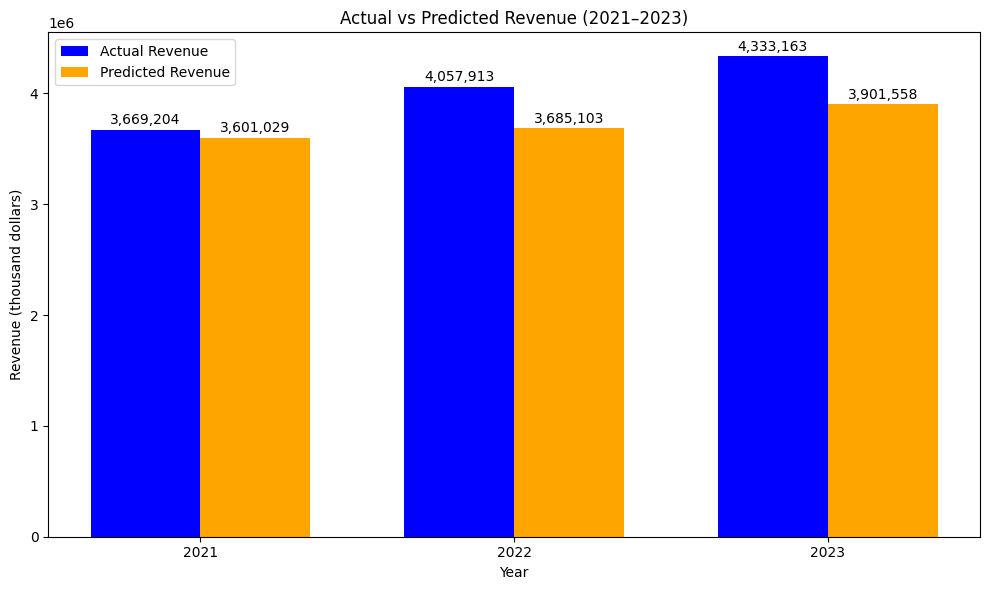


Summary of Results:
Year 2021 - Predicted Revenue: 3601029, Actual Revenue: 3669204, Prediction Error: 68175
Year 2022 - Predicted Revenue: 3685103, Actual Revenue: 4057913, Prediction Error: 372810
Year 2023 - Predicted Revenue: 3901558, Actual Revenue: 4333163, Prediction Error: 431605


In [6]:
# Random Forest Regressor for Revenue Prediction (combined graph)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# dataset
data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023],
    "Revenue (thousand dollars)": [3741620, 3611327, 3551281, 3669204, 4057913, 4333163],
    "Avg Price (cents/kWh)": [13.3, 13.12, 13.01, 13.12, 14.46, 16.6],
    "Total retail sales (MWh)": [62086455, 60720658, 57629040, 59303974, 59682719, 57033085]
}

df = pd.DataFrame(data)

years_to_predict = [2021, 2022, 2023]

# Lists for combined graph
years = []
actuals = []
predictions = []

results = []

# Loop through each year
for year in years_to_predict:
    train_data = df[df["Year"] <= year - 1]
    X_train = train_data[["Avg Price (cents/kWh)", "Total retail sales (MWh)"]]
    y_train = train_data["Revenue (thousand dollars)"]

    test_data = df[df["Year"] == year][["Avg Price (cents/kWh)", "Total retail sales (MWh)"]]
    actual_revenue = df[df["Year"] == year]["Revenue (thousand dollars)"].values[0]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(test_data)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    predicted_revenue = model.predict(X_test_scaled)[0]

    predictions.append(predicted_revenue)
    actuals.append(actual_revenue)
    years.append(year)

    results.append({
        "Year": year,
        "Predicted Revenue": predicted_revenue,
        "Actual Revenue": actual_revenue,
        "Prediction Error": abs(actual_revenue - predicted_revenue)
    })

    print(f"\nPredicted Revenue for {year}: {predicted_revenue:,.0f}")
    print(f"Actual Revenue for {year}: {actual_revenue:,.0f}")
    print(f"Prediction Error for {year}: {abs(actual_revenue - predicted_revenue):,.0f}")

    # 3-fold Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')
    cv_mse_scores = -cv_scores
    average_cv_mse = np.mean(cv_mse_scores)

    print(f"Cross-validation MSE scores for {year}: {cv_mse_scores}")
    print(f"Average cross-validation MSE for {year}: {average_cv_mse:.2f}")

# Combined bar chart
x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, actuals, width, label='Actual Revenue', color='blue')
plt.bar(x + width/2, predictions, width, label='Predicted Revenue', color='orange')

plt.xlabel("Year")
plt.ylabel("Revenue (thousand dollars)")
plt.title("Actual vs Predicted Revenue (2021–2023)")
plt.xticks(x, years)
plt.legend()

# Add labels on top of bars
for i in range(len(years)):
    plt.text(x[i] - width/2, actuals[i] + 50000, f"{actuals[i]:,.0f}", ha='center', fontsize=10)
    plt.text(x[i] + width/2, predictions[i] + 50000, f"{predictions[i]:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nSummary of Results:")
for r in results:
    print(f"Year {r['Year']} - Predicted Revenue: {r['Predicted Revenue']:.0f}, "
          f"Actual Revenue: {r['Actual Revenue']:.0f}, "
          f"Prediction Error: {r['Prediction Error']:.0f}")


Strengths: The cross-validation show that the model is capable of providing error estimates for each year. The average Mean Squared Error (MSE) for 2021 (10.31 billion) and 2022 (7.1 billion) suggests that the model performs reasonably well, with smaller errors compared to 2023. This tells me that the model is able to predict revenue trends fairly accurately for the earlier years. For 2021 and 2022, the MSE values are not excessively high, and this could be promising when used for making predictions for future years.

Weaknesses: However, the model shows significant variability in its error for 2023, with the MSE values ranging from 17.8 billion to over 138.9 billion, leading to an average MSE of 65.27 billion. This large error indicates that the model struggles to predict revenue accurately for 2023, potentially due to the increased complexity in the data or a lack of key features. The model's performance declines as the prediction year moves further away from the training data, signaling potential overfitting to past years or insufficient training data. The wide range of MSE values also suggests that the model might not generalize well for future years beyond the training period. This drastic shift may be due to the rate of changing increase. 


Overall, the MSE and cross-validation results suggest that there are additional features that need to be considered for accurate predictions using the learning model. Without these, the data could become skewed, leading to unreliable predictions. For future research, I may explore tuning the hyperparameters of the Random Forest model to achieve more consistent results across the folds. Additionally, I could add more features or transform existing ones to enhance the model's ability to make accurate predictions.

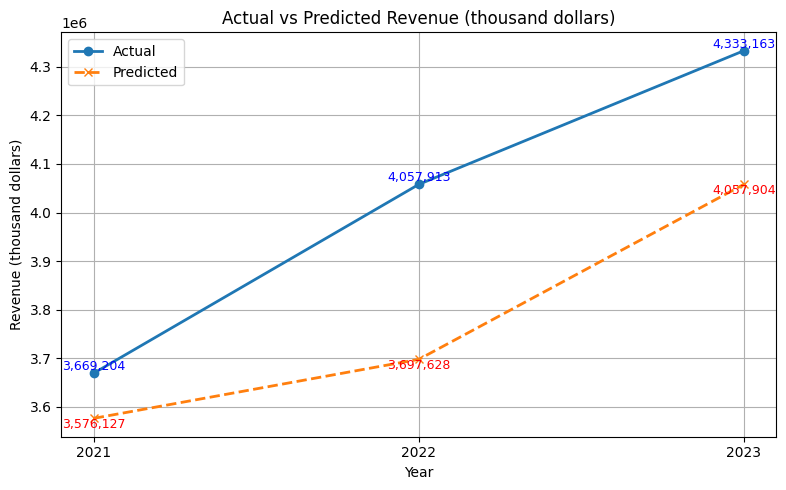

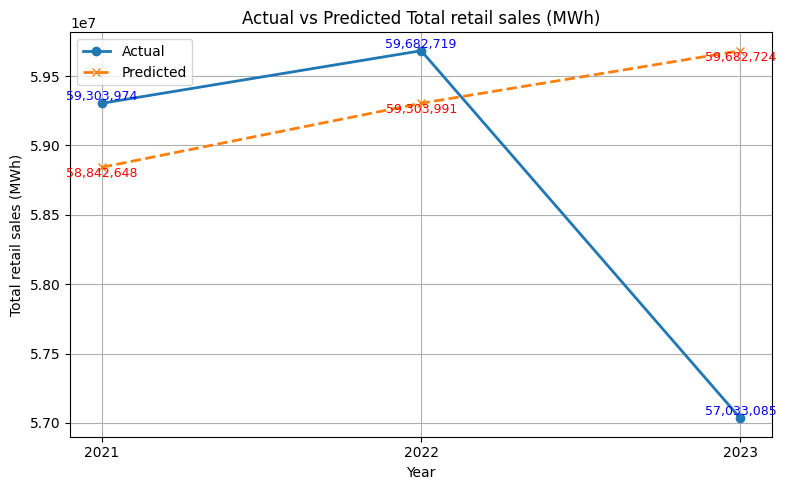

MAE for Revenue (thousand dollars): 242,873.56
MAE for Total retail sales (MWh): 1,163,231.13

Revenue (thousand dollars) - Actual vs Predicted:
Year   |          Actual |       Predicted
-------------------------------------------
2021   |       3,669,204 |       3,576,127
2022   |       4,057,913 |       3,697,628
2023   |       4,333,163 |       4,057,904

Total retail sales (MWh) - Actual vs Predicted:
Year   |          Actual |       Predicted
-------------------------------------------
2021   |      59,303,974 |      58,842,648
2022   |      59,682,719 |      59,303,991
2023   |      57,033,085 |      59,682,724


In [ ]:
#Gradient Boosting Regressor for Revenue and Retail Sales Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023],
    "Revenue (thousand dollars)": [3741620, 3611327, 3551281, 3669204, 4057913, 4333163],
    "Avg Price (cents/kWh)": [13.3, 13.12, 13.01, 13.12, 14.46, 16.6],
    "Total retail sales (MWh)": [62086455, 60720658, 57629040, 59303974, 59682719, 57033085]
}
df = pd.DataFrame(data)

# targets to predict
targets = ["Revenue (thousand dollars)", "Total retail sales (MWh)"]

results = {t: {"actual": [], "predicted": []} for t in targets}
years = [2021, 2022, 2023]

# sequential Forecasting
for i in range(3, 6):
    train_df = df.iloc[:i]
    test_df = df.iloc[[i]]

    for target in targets:
        X_train = train_df.drop(columns=targets)
        y_train = train_df[target]
        X_test = test_df.drop(columns=targets)
        y_test = test_df[target]

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model
        model = GradientBoostingRegressor(random_state=42)
        model.fit(X_train_scaled, y_train)

        # Prediction
        y_pred = model.predict(X_test_scaled)
        results[target]["actual"].append(y_test.values[0])
        results[target]["predicted"].append(y_pred[0])

# --- visualization with Point Labels ---
for target in targets:
    actual = results[target]["actual"]
    predicted = results[target]["predicted"]

    plt.figure(figsize=(8, 5))
    plt.plot(years, actual, marker='o', label="Actual", linewidth=2)
    plt.plot(years, predicted, marker='x', label="Predicted", linestyle='--', linewidth=2)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Year")
    plt.ylabel(target)
    plt.xticks(years)  # Ensure no decimals

    # Annotate actual values
    for x, y in zip(years, actual):
        plt.text(x, y, f'{y:,.0f}', va='bottom', ha='center', fontsize=9, color='blue')

    # annotate predicted values
    for x, y in zip(years, predicted):
        plt.text(x, y, f'{y:,.0f}', va='top', ha='center', fontsize=9, color='red')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# MAE Reporting
for target in targets:
    mae = mean_absolute_error(results[target]["actual"], results[target]["predicted"])
    print(f"MAE for {target}: {mae:,.2f}")


for target in targets:
    print(f"\n{target} - Actual vs Predicted:")
    print(f"{'Year':<6} | {'Actual':>15} | {'Predicted':>15}")
    print("-" * 43)
    for year, actual, pred in zip(years, results[target]["actual"], results[target]["predicted"]):
        print(f"{year:<6} | {actual:>15,.0f} | {pred:>15,.0f}")

Analysis:
The predictive model shows strong performance in forecasting both the revenue and total retail electricity sales, with acceptable levels of error from the data. 
The revenue prediction:
The models analysis, checked using a Mean Absolute error(MAE). The MAE about for revnue predictions tells us that the model was on average about $243 million off from  the actual amount year year. This means that the model used underestimated revenue for all tree years, especially in 2022 and 2023. This indicates that there is a posibility of undrefitting the rata for recent spikes. 

Total retail sales prediction:
The MAE used to check this model reflects that the model was off about 1.16 million megawatt-hours on average. For 2021 and 2022 the predictions were close, however in 2023 the guss was much higher than the actual mesurement reported. This can also be seen in the graph "Actual vs Predicted Total retail sales" 2021-2022 the trends are similar, however there is a bit change in 2023.